In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
df = pd.read_csv('predict_data.csv')


In [65]:
df

,url,postcode,longitude,latitude,price,bed,bath,parking,cbd_dist,school_counts,furnished,2022 no.,2023 no.,2024 no.,2025 no.
0,https://www.domain.com.au/9-21-rockley-road-so...,3141,144.999757,-37.837338,400.0,1,1,1.0,5.9614,6.0,0,6515.0,6508.0,6512.0,6520.0
1,https://www.domain.com.au/35-233-canterbury-ro...,3182,144.976195,-37.859150,360.0,1,1,1.0,4.1882,5.0,0,16152.0,16303.0,16522.0,16692.0
2,https://www.domain.com.au/2-31-howitt-street-s...,3141,145.002817,-37.846776,320.0,1,1,0.0,6.9114,6.0,0,6515.0,6508.0,6512.0,6520.0
3,https://www.domain.com.au/2-17-railway-parade-...,3163,145.069344,-37.891722,360.0,1,1,1.0,14.3864,5.0,0,14114.0,14380.0,14662.0,14942.0
4,https://www.domain.com.au/2-16-vale-st-st-kild...,3182,144.983362,-37.866152,320.0,1,1,1.0,5.8505,5.0,0,16152.0,16303.0,16522.0,16692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,https://www.domain.com.au/20-flourish-walk-dor...,3754,145.125547,-37.618487,350.0,2,1,1.0,37.3377,10.0,0,4348.0,4353.0,4359.0,4376.0
3428,https://www.domain.com.au/3-21-brickwood-st-br...,3186,144.997177,-37.895316,510.0,2,1,1.0,8.7118,8.0,0,19519.0,19744.0,19999.0,20259.0
3429,https://www.domain.com.au/16-spring-street-pra...,3181,145.003893,-37.850608,550.0,2,1,0.0,7.0455,3.0,0,20158.0,20756.0,21280.0,21647.0
3430,https://www.domain.com.au/109-39-riversdale-ro...,3122,145.029314,-37.827784,600.0,2,2,1.0,9.1834,8.0,0,16028.0,16249.0,16618.0,17208.0


In [66]:
# details of data
df.describe()

,postcode,longitude,latitude,price,bed,bath,parking,cbd_dist,school_counts,furnished,2022 no.,2023 no.,2024 no.,2025 no.
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000
mean,3131.535839,145.002542,-37.816463,399.235723,1.251166,1.065559,0.752622,20.866961,5.743007,0.099068,14148.539044,14544.656469,14952.129079,15359.957168
std,142.657316,0.322718,0.236923,136.372593,0.433747,0.248721,0.559223,43.299498,4.178170,0.298796,4299.627031,4432.893247,4613.683617,4850.849991
min,3000.000000,141.619694,-38.634765,50.000000,1.000000,1.000000,0.000000,0.038100,0.000000,0.000000,4348.000000,4353.000000,4359.000000,4376.000000
25%,3052.000000,144.959647,-37.867660,315.000000,1.000000,1.000000,0.000000,6.085600,4.000000,0.000000,10185.000000,10739.000000,11281.000000,11814.000000
50%,3127.000000,144.990465,-37.825926,380.000000,1.000000,1.000000,1.000000,9.759700,5.000000,0.000000,14605.000000,14704.000000,15095.000000,15532.000000
75%,3182.000000,145.039977,-37.797367,450.000000,2.000000,1.000000,1.000000,14.965950,6.000000,0.000000,17448.000000,17955.000000,18196.000000,18470.000000
max,3996.000000,147.286164,-35.337321,2600.000000,2.000000,3.000000,6.000000,384.683900,33.000000,1.000000,25490.000000,25777.000000,26176.000000,26872.000000


In [67]:
df.fillna(0, inplace=True)

In [68]:
# details with price and school counts
data_price_school = pd.DataFrame({'price': df.price, 'school_counts': df.school_counts})
data_price_school

,price,school_counts
0,400.0,6.0
1,360.0,5.0
2,320.0,6.0
3,360.0,5.0
4,320.0,5.0
...,...,...
3427,350.0,10.0
3428,510.0,8.0
3429,550.0,3.0
3430,600.0,8.0


Text(0.5, 1.0, 'The heatmap of correlation')

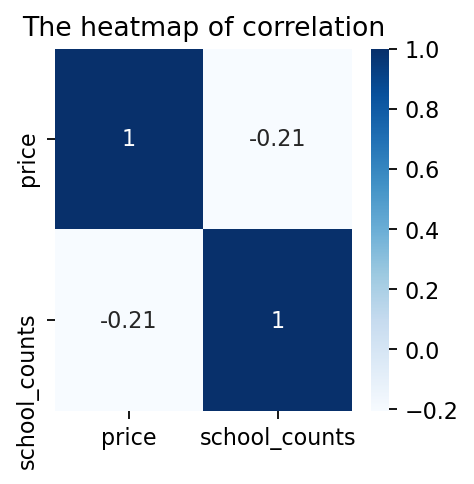

In [69]:
# correlation of price and school_counts
corr1 = data_price_school.corr()
plt.figure(figsize=(3,3), dpi=160)
sns.heatmap(corr1, cmap='Blues', annot=True)
plt.title('The heatmap of correlation')

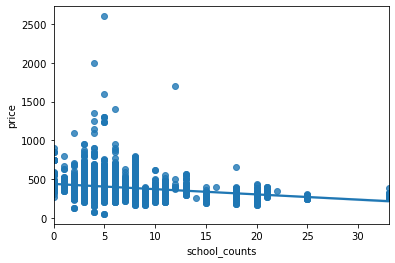

In [83]:
# visualise school_counts'
sns.regplot(x='school_counts', y='price', data=df)
plt.show()

In [84]:
# details with price and decoration
data_price_furnished = pd.DataFrame({'price': df.price, 'furnished': df.furnished})
data_price_furnished

,price,furnished
0,400.0,0
1,360.0,0
2,320.0,0
3,360.0,0
4,320.0,0
...,...,...
3427,350.0,0
3428,510.0,0
3429,550.0,0
3430,600.0,0


Text(0.5, 1.0, 'The heatmap of correlation')

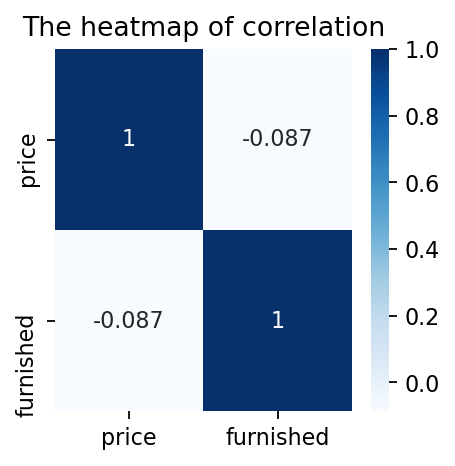

In [85]:
# correlation of price and furnished
corr2 = data_price_furnished.corr()
plt.figure(figsize=(3,3), dpi=160)
sns.heatmap(corr2, cmap='Blues', annot=True)
plt.title('The heatmap of correlation')

In [86]:
df.dropna(inplace=True)

In [87]:
df_d=df.drop(['url','longitude','latitude','postcode','parking','school_counts','bath','furnished'],axis=1)
df_d.head()

,price,bed,cbd_dist,2022 no.,2023 no.,2024 no.,2025 no.
0,400.0,1,5.9614,6515.0,6508.0,6512.0,6520.0
1,360.0,1,4.1882,16152.0,16303.0,16522.0,16692.0
2,320.0,1,6.9114,6515.0,6508.0,6512.0,6520.0
3,360.0,1,14.3864,14114.0,14380.0,14662.0,14942.0
4,320.0,1,5.8505,16152.0,16303.0,16522.0,16692.0


In [88]:
df_p=df_d.copy()
df_p.head()

,price,bed,cbd_dist,2022 no.,2023 no.,2024 no.,2025 no.
0,400.0,1,5.9614,6515.0,6508.0,6512.0,6520.0
1,360.0,1,4.1882,16152.0,16303.0,16522.0,16692.0
2,320.0,1,6.9114,6515.0,6508.0,6512.0,6520.0
3,360.0,1,14.3864,14114.0,14380.0,14662.0,14942.0
4,320.0,1,5.8505,16152.0,16303.0,16522.0,16692.0


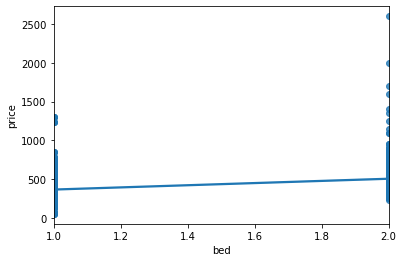

In [89]:
# visualise number of bedroom
sns.regplot(x='bed', y='price', data=df_p)
plt.show()

<AxesSubplot:>

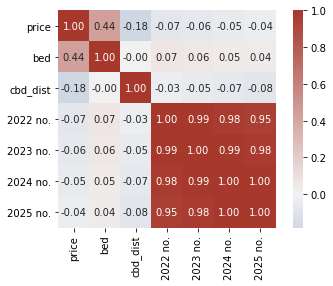

In [76]:
#correlation of price and bedroom or distance
matrix = df_p.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
sns.heatmap(matrix,center=0, annot=True,fmt='.2f', square=True, cmap=cmap)

In [77]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
area=df_p['bed']
price=df_p['price']
area = np.array(area).reshape(-1,1)
price = np.array(price).reshape(-1,1)
model = linear.fit(area,price)
print(model.intercept_, model.coef_)

[224.56399018] [[139.60721605]]


In [78]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
area=df_p['cbd_dist']
price=df_p['price']
area = np.array(area).reshape(-1,1)
price = np.array(price).reshape(-1,1)
model = linear.fit(area,price)
print(model.intercept_, model.coef_)

[411.15282135] [[-0.57109892]]


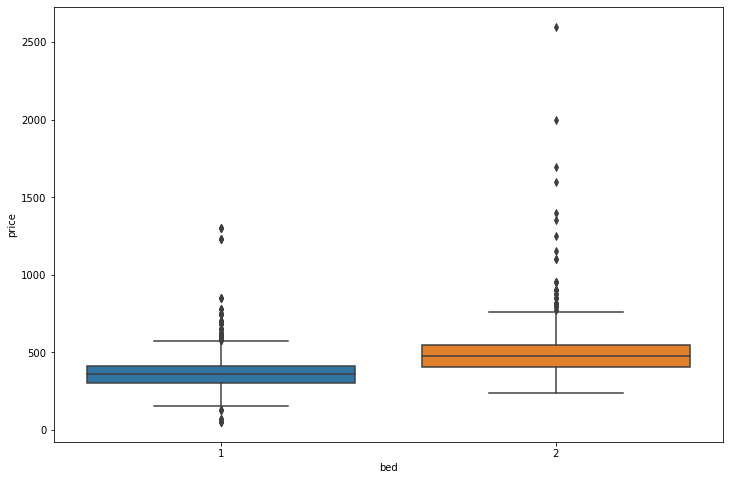

In [79]:
#price vs num of bed 
linear_p = model.predict(area)
plt.figure(figsize=(12,8))
sns.boxplot(x='bed', y='price', data=df_p)
plt.show()

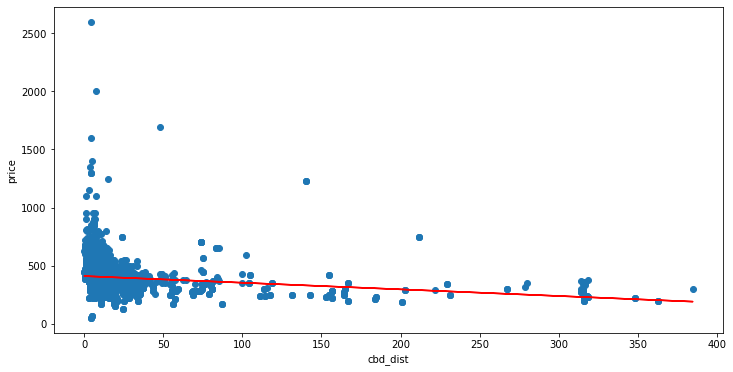

In [80]:
#price vs distance from CBD 
linear_p = model.predict(area)
plt.figure(figsize=(12,6))
plt.scatter(area,price)
plt.plot(area,linear_p,'red')
plt.xlabel("cbd_dist")
plt.ylabel("price")
plt.show()